# **1. Download das Bibliotecas**

In [121]:
#%pip install river pandas==2.2.2 scipy==1.13.1 numpy==1.26.1

In [122]:
#%pip install matplotlib yfinance scikit-learn scikit-optimize

# **2. Importações**

## Geral

In [123]:
# Importação de libs auxiliares
import numpy as np
import pandas as pd

# Importando as classes refatoradas
from utils.SeriesProcessor import SeriesProcessor
from avaliacao.DriftEvaluator import DriftEvaluator
from utils.Visualizer import Visualizer
from utils.SaveCSV import SaveCSV

# limpar o log
import warnings
warnings.filterwarnings("ignore")

## Importação dos Detectores e Regressores Off-line e On-line

In [124]:
# Importando detectores de drift
from detectores.ADWINDetector import ADWINDetector
from detectores.DDMDetector import DDMDetector
from detectores.EDDMDetector import EDDMDetector
from detectores.FHDDMDetector import FHDDMDetector
from detectores.HDDM_ADetector import HDDM_ADetector
from detectores.PageHinkleyDetector import PageHinkleyDetector
from detectores.HDDM_WDetector import HDDM_WDetector
from detectores.KSWINDetector import KSWINDetector

In [125]:
# Importando modelos offline
from regressores.modelosOffline.LinearRegressionModelo import LinearRegressionModelo
from regressores.modelosOffline.KneighborsRegressorModelo import KNeighborsRegressorModelo
from regressores.modelosOffline.LassoRegressionModelo import LassoRegressionModelo
from regressores.modelosOffline.RidgeRegressionModelo import RidgeRegressionModelo
from regressores.modelosOffline.SVRModelo import SVRModelo
from regressores.modelosOffline.RandomForestModelo import RandomForestModelo
from regressores.modelosOffline.MLPRegressorModelo import MLPRegressorModelo

In [126]:
# Importando modelos online
from regressores.modelosOnline.BayesianLinearRegressionModelo import BayesianLinearRegressionModelo
from regressores.modelosOnline.HoeffdingTreeRegressorModelo import HoeffdingTreeRegressorModelo
from regressores.modelosOnline.KNNRegressorOnlineModelo import KNNRegressorOnlineModelo
from regressores.modelosOnline.LinearRegressionOnlineModelo import LinearRegressionOnlineModelo

# **3. Dados e Pré-processamento**

## Séries Temporais

In [127]:
# Lista de séries temporais disponíveis
series = [
    "AAPL",
    "B3SA3.SA",
    "^IXIC",
    "^DJI",
    "^GSPC",
    "^BVSP",
    "USDBRL=X"
]

## Parâmetros de processamento

In [128]:
# Definindo parâmetros para processamento
tamanho_batch = 100
lags = 5
serie_escolhida = series[-2]
print(f"Processando série: {serie_escolhida}")

Processando série: ^BVSP


## Processamento dos dados

In [129]:
# Baixando os dados da ação
serie_temporal = SeriesProcessor.baixar_dados(serie_escolhida)

# Normalizando a série temporal
serie_temporal = SeriesProcessor.normalizar_serie(serie_temporal)
print(f"Shape da série após normalização: {serie_temporal.shape}")

# Gerando janelas temporais
X, Y = SeriesProcessor.criar_janela_temporal(serie_temporal, lags)
print(f"Shape dos dados de entrada: {X.shape}")
print(f"Shape dos dados de saída: {Y.shape}")

[*********************100%***********************]  1 of 1 completed

Shape da série após normalização: (1244, 1)
Shape dos dados de entrada: (1239, 5)
Shape dos dados de saída: (1239, 1)


# **4. Definição dos Modelos**

## Regressores off-line

In [130]:
modelos_offline = [
        LinearRegressionModelo,
        KNeighborsRegressorModelo,
        LassoRegressionModelo,
        MLPRegressorModelo,  
        RandomForestModelo,
        RidgeRegressionModelo,
        SVRModelo
    ]

## Regressores on-line

In [131]:
modelos_online = [
        BayesianLinearRegressionModelo,
        HoeffdingTreeRegressorModelo,
        KNNRegressorOnlineModelo,
        LinearRegressionOnlineModelo
    ]

# **5. Prequential com Detecção de Drift**

In [137]:
predicoes_ativo, deteccoes, mae_ativo = DriftEvaluator.prequential_batch(X, Y, tamanho_batch, LinearRegressionModelo, HDDM_WDetector)

Modelo utilizado: <regressores.modelosOffline.LinearRegressionModelo.LinearRegressionModelo object at 0x00000216EAF577D0>
Detector utilizado: <detectores.HDDM_WDetector.HDDM_WDetector object at 0x00000216EADDF230>
MAE Modelo Batch: [0.11351031]


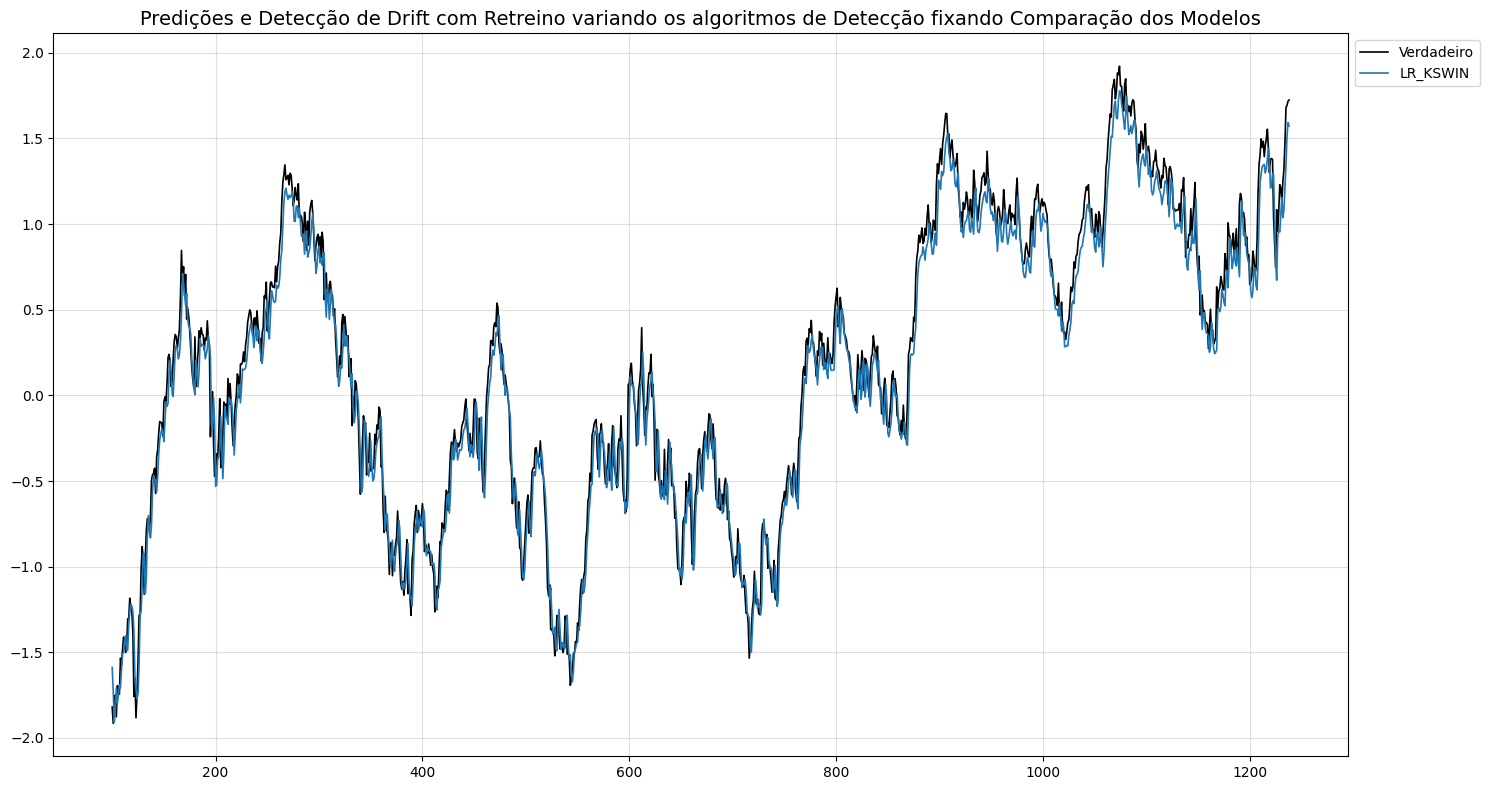

In [138]:
# Plotando os resultados
Visualizer.plotar_resultados_multi(Y,
                  [predicoes_ativo],
                  ["LR_KSWIN"],
                  [deteccoes],
                  tamanho_batch,
                  detector_or_modelo="Comparação dos Modelos",
                  )

In [139]:
modelos_online = [
        BayesianLinearRegressionModelo,
        HoeffdingTreeRegressorModelo,
        KNNRegressorOnlineModelo,
        LinearRegressionOnlineModelo
    ]

# **6. Prequential Passivo**

In [140]:
predicoes_passivo, mae = DriftEvaluator.prequential_passivo(X, Y, tamanho_batch, BayesianLinearRegressionModelo)

Modelo utilizado: <regressores.modelosOnline.BayesianLinearRegressionModelo.BayesianLinearRegressionModelo object at 0x00000216EAF68FB0>
MAE Modelo Online: 0.09323572808063478


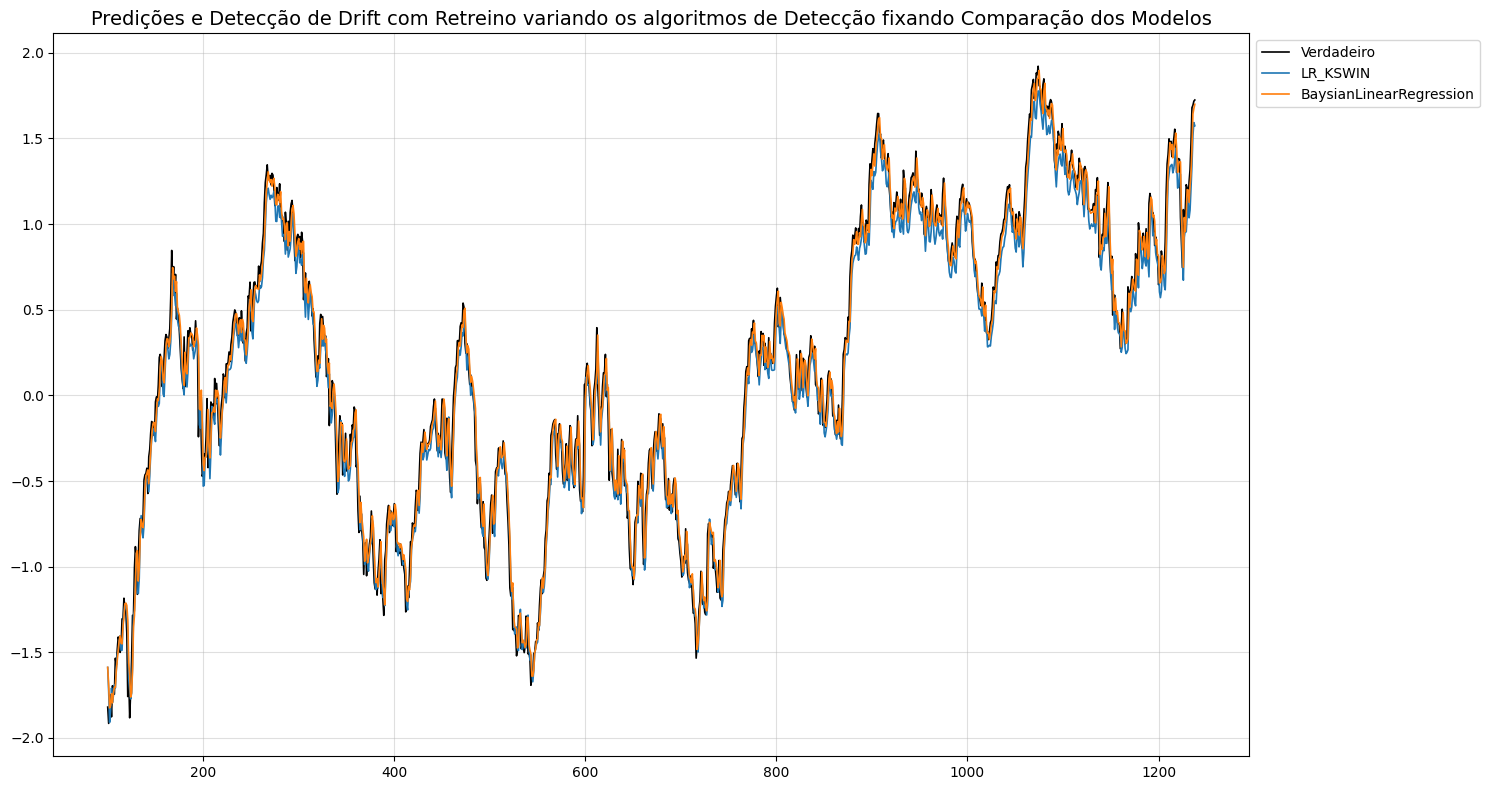

In [141]:
# Plotando os resultados
Visualizer.plotar_resultados_multi(Y,
                  [predicoes_ativo,
                   predicoes_passivo],
                  ["LR_KSWIN",
                   "BaysianLinearRegression"],
                  [deteccoes],
                  tamanho_batch,
                  detector_or_modelo="Comparação dos Modelos",
                  )